Alvaro David Montero Barraza
Tecnologías de Lenguaje Natural
5BV1
Ingeniería en Inteligencia Artificial

Este programa realiza un análisis exploratorio a un texto, posteriormente se aplican tecnicas de normalización al texto
Y un análisis exploratorio al resultado normalizado

Análisis Exploratorio de texto

Tokens

In [15]:
#Importacion de librerias
import spacy
from collections import Counter
from nltk.tokenize import word_tokenize

english_text=0
with open("english.txt","r",encoding="utf-8") as f:
    english_text=f.read()
#print(english_text)
nlp=spacy.load('en_core_web_sm')
doc=nlp(english_text)

tokens=word_tokenize(english_text,language='english')

print(tokens)
print("\nNumero total de tokens en el texto: "+str(len(tokens)))


['My', 'own', 'journey', 'toward', 'language', 'was', 'sparked', 'in', '1996', 'when', 'I', 'discovered', 'Keith', 'Basso', '’', 's', 'astonishing', 'book', 'Wisdom', 'Sits', 'in', 'Places', '.', 'Writing', 'about', 'the', 'unique', 'place-making', 'language', 'of', 'the', 'Western', 'Apache', ',', 'Basso', 'described', 'language', 'in', 'a', 'way', 'that', 'I', '’', 'd', 'never', 'considered', 'before', ',', 'as', 'roots', 'and', 'fragments', 'strung', 'together', 'to', 'sing', 'of', 'the', 'land', '.', 'This', 'idea', 'intrigued', 'me', 'so', 'much', 'that', 'I', 'began', 'carrying', 'Donald', 'Borror', '’', 's', 'classic', 'little', 'book', ',', 'the', 'Dictionary', 'of', 'Word', 'Roots', 'and', 'Combining', 'Forms', ',', 'with', 'me', 'on', 'all', 'my', 'hikes', '(', 'a', 'practice', 'which', 'I', '’', 've', 'continued', 'on', 'a', 'daily', 'basis', 'for', 'nearly', 'twenty', 'years', 'and', 'on', 'thousands', 'of', 'miles', 'of', 'trails', ')', 'in', 'order', 'to', 'learn', 'the',

Tokens únicos

In [16]:
tokens_freq=Counter(tokens) #Contador de frecuencia de tokens

unique_tokens=[token for token,freq in tokens_freq.items() if freq==1]

print(unique_tokens)

print("\nNumero de tokens unicos "+str(len(unique_tokens)))



['My', 'journey', 'toward', 'was', 'sparked', '1996', 'discovered', 'Keith', 'astonishing', 'Wisdom', 'Sits', 'Places', 'Writing', 'about', 'unique', 'place-making', 'Western', 'Apache', 'described', 'way', 'd', 'never', 'considered', 'before', 'roots', 'fragments', 'strung', 'together', 'sing', 'idea', 'intrigued', 'much', 'carrying', 'Donald', 'Borror', 'classic', 'Dictionary', 'Word', 'Roots', 'Combining', 'Forms', 'all', '(', 'practice', 've', 'continued', 'daily', 'basis', 'nearly', 'twenty', 'thousands', 'miles', 'trails', ')', 'order', 'learn', 'meaning', 'origin', 'word', 'elements', 'at', 'moment', 'they', 'occurred', 'while', 'walking', 'landscapes', 'For', 'seemed', 'more', 'than', 'quirky', 'hobby', 'no', 'real', 'intent', 'or', 'direction', 'but', 'then', 'friend', 'introduced', 'Calvert', 'Watkins', 'magisterial', 'survey', 'Indo-European', 'poetics', 'How', 'Kill', 'Dragon', 'In', 'flash', 'realized', 'there', 'might', 'be', 'untapped', 'ways', 'speak', 'magic', 'depths'

Histograma de los 15 tokens mas comunes

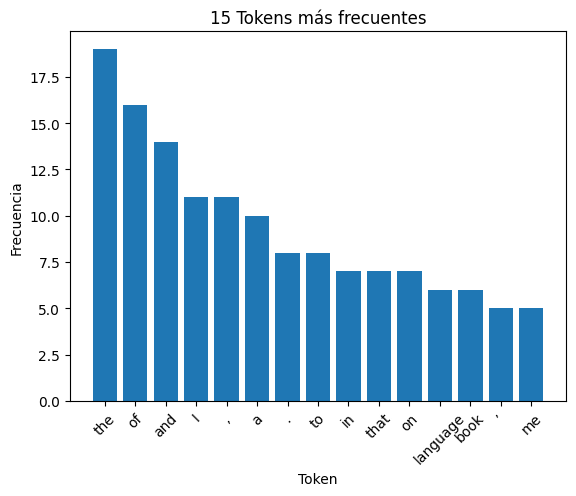

In [17]:
import matplotlib.pyplot as plt
ordered_tokens=tokens_freq.most_common(15)
tokens_graph=[token[0] for token in ordered_tokens]
token_freq=[token[1] for token in ordered_tokens]

plt.bar(tokens_graph,token_freq)
plt.title('15 Tokens más frecuentes')
plt.xlabel('Token')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)
plt.show()


Histograma de los 15 tokens menos comunes

Hay 171 tokens que comparten esa característica


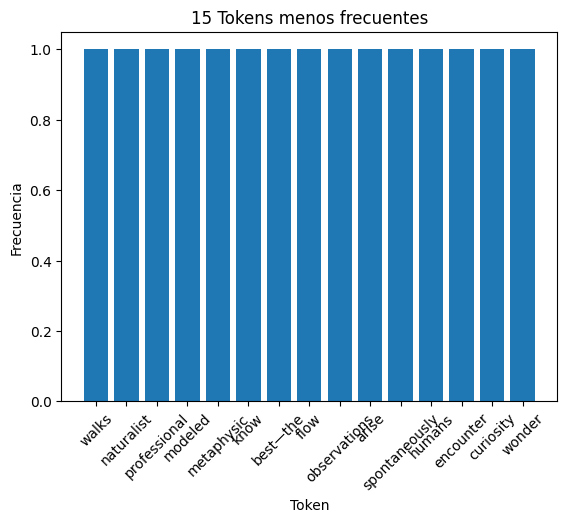

In [18]:
ordered_tokens=tokens_freq.most_common()
less_common_tokens = ordered_tokens[-15:]

tokens_graph=[token[0] for token in less_common_tokens]
token_freq=[token[1] for token in less_common_tokens]

plt.bar(tokens_graph,token_freq)
plt.title('15 Tokens menos frecuentes')
plt.xlabel('Token')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)
print("Hay "+str(len(unique_tokens))+" tokens que comparten esa característica")
plt.show()



Normalización de texto

In [20]:

from nltk.stem import SnowballStemmer
 
tokens_stopless=[token for token in doc if not token.is_stop]
stemmer=SnowballStemmer("english")

stems=[stemmer.stem(token.lemma_) for token in tokens_stopless]
pos_test=[(token.lemma_,token.pos_) for token in tokens_stopless]
print("Stemming")
print(stems)

lemmas_pos=[(token.lemma_,token.pos_) for token in nlp(" ".join(stems))]
print("\nLemmas y postagging con spacy y nltk con stemming")
print(lemmas_pos)
print("\nLemmas y postagging con solo nltk")
print(pos_test)
print("\nStemming a proceso de nltk ")
stem_ntlk=[(stemmer.stem(token[0]),token[1]) for token in pos_test]
print(stem_ntlk)

Stemming
['journey', 'languag', 'spark', '1996', 'discov', 'keith', 'basso', '\n', 'astonish', 'book', 'wisdom', 'sit', 'place', '.', 'write', 'uniqu', 'place', '-', 'make', 'languag', '\n', 'western', 'apach', ',', 'basso', 'describ', 'languag', 'way', 'consid', ',', 'root', '\n', 'fragment', 'string', 'sing', 'land', '.', 'idea', 'intrigu', 'begin', '\n', 'carri', 'donald', 'borror', 'classic', 'littl', 'book', ',', 'dictionari', 'word', 'root', 'combin', 'form', ',', '\n', 'hike', '(', 'practic', 'continu', 'daili', 'basi', 'near', 'year', '\n', 'thousand', 'mile', 'trail', ')', 'order', 'learn', 'mean', 'origin', 'word', 'element', '\n', 'moment', 'occur', 'walk', 'wild', 'landscap', '.', '\n', 'year', 'littl', 'quirki', 'hobbi', ',', 'real', 'intent', 'direct', ',', '\n', 'friend', 'introduc', 'calvert', 'watkin', 'magisteri', 'survey', 'indo', '-', 'european', '\n', 'poetic', ',', 'kill', 'dragon', '.', 'flash', 'realiz', 'untap', 'way', '\n', 'english', 'languag', 'speak', 'magi

Hacemos ese orden para revisar que tan preciso fue hacerlo de una u otra manera, en este caso haciendo lemmatizacion
postagging y al final stemming nos dió un mejor resultado ya que se conserva el sentido de la palabra

In [21]:
#Pasar texto a minusculas
lower_text=[]
lower_text=[(token[0],token[1]) for token in stem_ntlk ]
print(lower_text)
print(len(lower_text))



[('journey', 'NOUN'), ('languag', 'NOUN'), ('spark', 'VERB'), ('1996', 'NUM'), ('discov', 'VERB'), ('keith', 'PROPN'), ('basso', 'PROPN'), ('\n', 'SPACE'), ('astonish', 'ADJ'), ('book', 'NOUN'), ('wisdom', 'PROPN'), ('sit', 'VERB'), ('place', 'PROPN'), ('.', 'PUNCT'), ('write', 'VERB'), ('uniqu', 'ADJ'), ('place', 'NOUN'), ('-', 'PUNCT'), ('make', 'VERB'), ('languag', 'NOUN'), ('\n', 'SPACE'), ('western', 'PROPN'), ('apach', 'PROPN'), (',', 'PUNCT'), ('basso', 'PROPN'), ('describ', 'VERB'), ('languag', 'NOUN'), ('way', 'NOUN'), ('consid', 'VERB'), (',', 'PUNCT'), ('root', 'NOUN'), ('\n', 'SPACE'), ('fragment', 'NOUN'), ('string', 'VERB'), ('sing', 'VERB'), ('land', 'NOUN'), ('.', 'PUNCT'), ('idea', 'NOUN'), ('intrigu', 'VERB'), ('begin', 'VERB'), ('\n', 'SPACE'), ('carri', 'VERB'), ('donald', 'PROPN'), ('borror', 'PROPN'), ('classic', 'ADJ'), ('littl', 'ADJ'), ('book', 'NOUN'), (',', 'PUNCT'), ('dictionari', 'PROPN'), ('word', 'PROPN'), ('root', 'PROPN'), ('combin', 'PROPN'), ('form', 

In [22]:
#Quitar puntuaciones
clean_text=[(token[0],token[1])for token in lower_text if token[1] != 'PUNCT']
print(clean_text)
print(len(clean_text))

[('journey', 'NOUN'), ('languag', 'NOUN'), ('spark', 'VERB'), ('1996', 'NUM'), ('discov', 'VERB'), ('keith', 'PROPN'), ('basso', 'PROPN'), ('\n', 'SPACE'), ('astonish', 'ADJ'), ('book', 'NOUN'), ('wisdom', 'PROPN'), ('sit', 'VERB'), ('place', 'PROPN'), ('write', 'VERB'), ('uniqu', 'ADJ'), ('place', 'NOUN'), ('make', 'VERB'), ('languag', 'NOUN'), ('\n', 'SPACE'), ('western', 'PROPN'), ('apach', 'PROPN'), ('basso', 'PROPN'), ('describ', 'VERB'), ('languag', 'NOUN'), ('way', 'NOUN'), ('consid', 'VERB'), ('root', 'NOUN'), ('\n', 'SPACE'), ('fragment', 'NOUN'), ('string', 'VERB'), ('sing', 'VERB'), ('land', 'NOUN'), ('idea', 'NOUN'), ('intrigu', 'VERB'), ('begin', 'VERB'), ('\n', 'SPACE'), ('carri', 'VERB'), ('donald', 'PROPN'), ('borror', 'PROPN'), ('classic', 'ADJ'), ('littl', 'ADJ'), ('book', 'NOUN'), ('dictionari', 'PROPN'), ('word', 'PROPN'), ('root', 'PROPN'), ('combin', 'PROPN'), ('form', 'PROPN'), ('\n', 'SPACE'), ('hike', 'NOUN'), ('practic', 'NOUN'), ('continu', 'VERB'), ('daili',

SEGUNDO ANÁLISIS EXPLORATORIO

In [23]:
print("Numero de tokens "+str(len(clean_text)))

Numero de tokens 184


In [24]:
#Tokens unicos
tokens_freq=Counter(elem[0] for elem in clean_text)
unique_tokens=[token for token,freq in tokens_freq.items() if freq==1]
print("Numero de tokens unicos "+str(len(unique_tokens)))
print(unique_tokens)

Numero de tokens unicos 97
['journey', 'spark', '1996', 'discov', 'keith', 'astonish', 'wisdom', 'sit', 'uniqu', 'western', 'apach', 'describ', 'consid', 'fragment', 'string', 'sing', 'intrigu', 'donald', 'borror', 'classic', 'dictionari', 'combin', 'form', 'practic', 'continu', 'daili', 'basi', 'near', 'thousand', 'mile', 'trail', 'order', 'learn', 'mean', 'origin', 'element', 'moment', 'occur', 'landscap', 'quirki', 'hobbi', 'real', 'intent', 'direct', 'friend', 'introduc', 'calvert', 'watkin', 'magisteri', 'survey', 'indo', 'european', 'poetic', 'kill', 'dragon', 'flash', 'realiz', 'untap', 'speak', 'magic', 'depth', 'spirit', 'quest', 'read', 'find', 'histori', 'format', 'result', 'investig', '76', 'explor', 'piec', 'go', 'shape', 'use', 'today', 'research', 'long', 'natur', 'reson', 'take', 'emerg', 'reflect', 'lead', 'naturalist', 'profession', 'model', 'metaphys', 'know', 'good', 'flow', 'observ', 'aris', 'spontan', 'encount', 'curios', 'wonder']


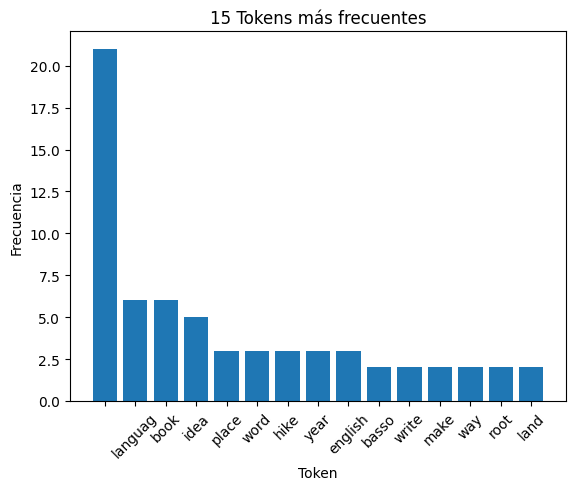

In [25]:
ordered_tokens=tokens_freq.most_common(15)
tokens_graph=[token[0] for token in ordered_tokens]
token_freq=[token[1] for token in ordered_tokens]
plt.bar(tokens_graph,token_freq)
plt.title('15 Tokens más frecuentes')
plt.xlabel('Token')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)
plt.show()

Hay 97 tokens que comparten esa característica


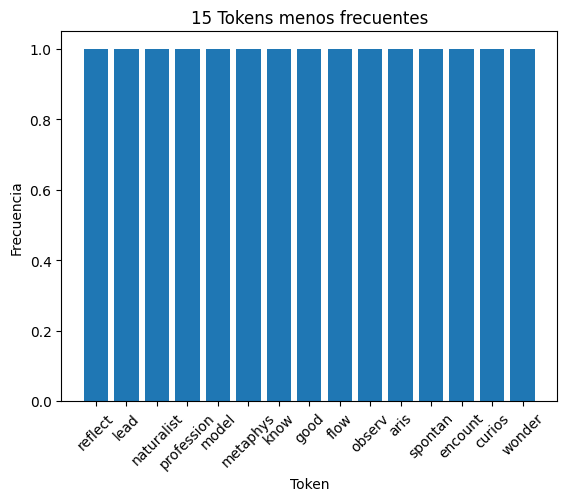

In [26]:
ordered_tokens=tokens_freq.most_common()
less_common_tokens = ordered_tokens[-15:]

tokens_graph=[token[0] for token in less_common_tokens]
token_freq=[token[1] for token in less_common_tokens]

plt.bar(tokens_graph,token_freq)
plt.title('15 Tokens menos frecuentes')
plt.xlabel('Token')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)
print("Hay "+str(len(unique_tokens))+" tokens que comparten esa característica")
plt.show()

